In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#converting basic data to datetime object using pandas
#document the symbols
pd.to_datetime('January 1st, 1970')

Timestamp('1970-01-01 00:00:00')

In [5]:
#read in the data
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [6]:
#our date column is an object, convert it to datetime
#convert entire column to datetime 
df.date = pd.to_datetime(df.date)
df.date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [8]:
#access some attributes of our datetime objects
#use .dt accessor like .str accessor, but for datetime objects
df.date.dt.day_name().head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4       Monday
Name: date, dtype: object

In [9]:
df.date.dt.month_name().head()

0    January
1    January
2    January
3    January
4    January
Name: date, dtype: object

In [10]:
#it is important to set datetimeobject as the index and sort it
#the dates farthest in the past will be at the top of the df,
#the most recent dates will be at the bottom (ascending- True)

df = df.set_index('date')
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


In [11]:
df = df.sort_values(by='date')
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


We can change the period of our data by:

    *upsample: inc # of points by dec time b/w points
    
    *downsample: dec # of points by inc time b/w points

In [12]:
# use .asfreq() method. this may introduce nulls
df = df.asfreq('d')
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


In [13]:
df.asfreq('m')

,coffee_consumption
date,
2019-01-31,9.035046
2019-02-28,9.093397
2019-03-31,NaN
2019-04-30,7.086039
2019-05-31,10.818797
2019-06-30,NaN
2019-07-31,10.790037
2019-08-31,NaN
2019-09-30,11.282275


In [14]:
# we can fill those missing values
# with fixed value, forward fill, or a back fill
df.coffee_consumption.bfill()[:10]

date
2019-01-01    14.301915
2019-01-02    12.905900
2019-01-03    10.046015
2019-01-04     6.354805
2019-01-05     8.545563
2019-01-06     8.545563
2019-01-07     8.545563
2019-01-08     9.410101
2019-01-09     7.219271
2019-01-10     9.338456
Freq: D, Name: coffee_consumption, dtype: float64

In [16]:
df.isnull().sum()
# there are still 104 nulls values

coffee_consumption    104
dtype: int64

In [17]:
df.shape
# that is almost a third of the data

(365, 1)

In [18]:
df = df.fillna(0)
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000


We can also change the period of our data using the .resample() method. This requires aggregate operation, like groupby

In [19]:
df.resample('2w').sum().head()

,coffee_consumption
date,
2019-01-06,43.608635
2019-01-20,97.711546
2019-02-03,101.648841
2019-02-17,109.631979
2019-03-03,96.473662


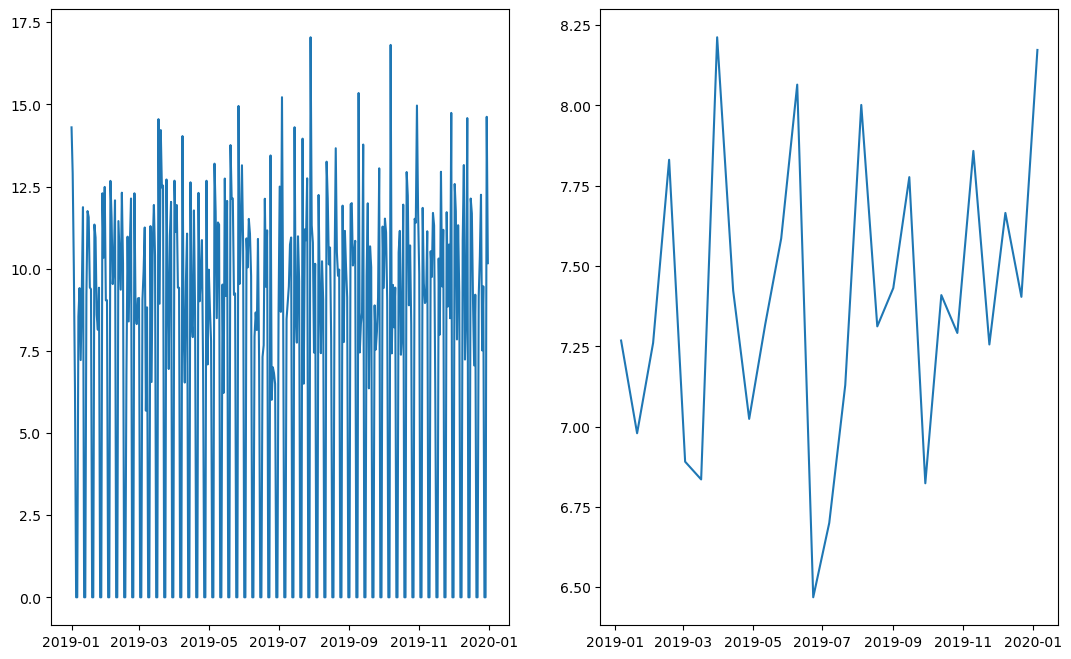

In [20]:
plt.figure(figsize = (13,8))
plt.subplot(121)
plt.plot(df)

plt.subplot(122)
plt.plot(df.resample('2w').mean())

In [21]:
# calculate aggregate metric over the last 'i' data points 
# using the .rolling()

df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000


In [23]:
df['rolling_3day'] =df.coffee_consumption.rolling(3).mean()
df.head()

,coffee_consumption,rolling_3day
date,,
2019-01-01,14.301915,NaN
2019-01-02,12.905900,NaN
2019-01-03,10.046015,12.417943
2019-01-04,6.354805,9.768907
2019-01-05,0.000000,5.466940


In [25]:
# use .dff() and .shift() to make comparisons between datapoints

df['shift2'] = df.coffee_consumption.shift(2)
df.head()

,coffee_consumption,rolling_3day,shift2
date,,,
2019-01-01,14.301915,NaN,NaN
2019-01-02,12.905900,NaN,NaN
2019-01-03,10.046015,12.417943,14.301915
2019-01-04,6.354805,9.768907,12.905900
2019-01-05,0.000000,5.466940,10.046015


In [26]:
df.coffee_consumption.diff(7)

date
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
                ...   
2019-12-27    0.255897
2019-12-28    0.000000
2019-12-29    0.000000
2019-12-30    5.460643
2019-12-31   -0.204085
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [27]:
#use .strftime()
df['my_column'] = df.index.strftime('%b, %d')
df.head()

,coffee_consumption,rolling_3day,shift2,my_column
date,,,,
2019-01-01,14.301915,NaN,NaN,"Jan, 01"
2019-01-02,12.905900,NaN,NaN,"Jan, 02"
2019-01-03,10.046015,12.417943,14.301915,"Jan, 03"
2019-01-04,6.354805,9.768907,12.905900,"Jan, 04"
2019-01-05,0.000000,5.466940,10.046015,"Jan, 05"


In [29]:
#find out idxmax and idxmin
df.rolling_3day.idxmax(), df.rolling_3day.idxmin()

(Timestamp('2019-03-22 00:00:00', freq='D'),
 Timestamp('2019-01-06 00:00:00', freq='D'))